# Нейроинформатика. Лабораторная работа 1
### Перцептроны. Процедура обучения Розенблатта

Целью работы является исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.

Выполнил Лисин Роман, группа М8О-406Б-20. Вариант 12.

Подключим библиотеки, необходимые для обучения перцептрона.

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

### Задание 1

Опишем датасет для первого задания, соответствующий варианту.

In [4]:
data1 = np.array([[2.7, 4.3], [-3.8, 0.6], [-0.4, -4.9], [-1.7, -3.4], [2.9, -1.9], [0.2, -3.4]])
labels1 = np.array([0, 0, 1, 1, 1, 1])
data1, labels1

(array([[ 2.7,  4.3],
        [-3.8,  0.6],
        [-0.4, -4.9],
        [-1.7, -3.4],
        [ 2.9, -1.9],
        [ 0.2, -3.4]]),
 array([0, 0, 1, 1, 1, 1]))

Обучим перцептрон для классификации точек:

In [5]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(1, activation='sigmoid'))

В качестве функции потерь использую бинарную кросс-энтропию (что более привычно для задач классификации). Функция активации - сигмоид.

In [6]:
model1.compile(loss='bce', optimizer='adam')

In [7]:
train_info1 = model1.fit(data1, labels1, batch_size=1, epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 2ms/step - loss: 1.9264
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 1.9130
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 1.9025
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 1.8906
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 1.8800
Epoch 6/500
6/6 [==============================] - 0s 1ms/step - loss: 1.8697
Epoch 7/500
6/6 [==============================] - 0s 1ms/step - loss: 1.8584
Epoch 8/500
6/6 [==============================] - 0s 1ms/step - loss: 1.8490
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 1.8379
Epoch 10/500
6/6 [==============================] - 0s 2ms/step - loss: 1.8273
Epoch 11/500
6/6 [==============================] - 0s 1ms/step - loss: 1.8153
Epoch 12/500
6/6 [==============================] - 0s 1ms/step - loss: 1.8058
Epoch 13/500
6/6 [==============================] - 0s 2ms/st

In [2]:
def plot_loss(train_info):
    plt.figure(figsize=(6, 6))
    loss_history = train_info.history['loss']
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.grid()
    plt.show()

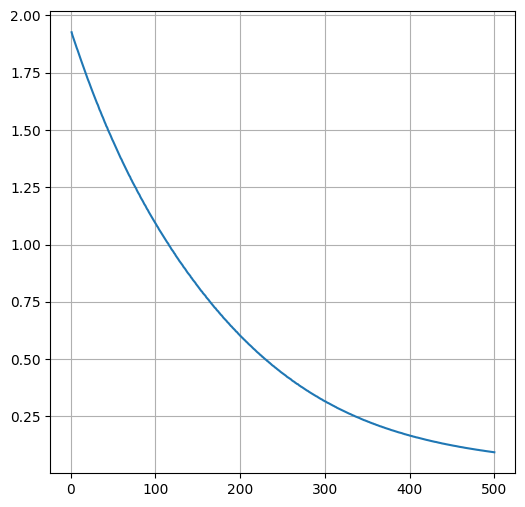

In [9]:
plot_loss(train_info1)

График функции потерь показывает, что обучение происходит правильно: потери уменьшаются, точность возрастает.

Построим разделяющую линию для двумерного случая.

Мы знаем, что однослойный перцептрон - линейный слой, поэтому разделяющая линия будет прямой. Любую прямую можно задать уравнением:

$$ax + by + c = 0$$

С математической точки зрения перцептрон - это функция вида

$$perceptron(v) = vA + b$$
где $v = (x, y)$, $A = (a_0, a_1)^T$

Записывая в скалярном виде:
$$perceptron(x, y) = a_0x + a_1y + b$$

Если значение этой функции больше нуля (сигмоида от результата больше 0.5), то относим точку $(x, y)$ к первому классу, иначе ко второму. Следовательно, искомая разделяющая прямая имеет вид
$$a_0x + a_1y + b = 0$$

Коэффициенты $a_i, b$ нам известны.

Для построения прямой возьмем несколько значений $x$, для каждого из них найдем $y = \frac{(-a_0x - b)}{a_1}$

In [10]:
def plot_result(data, labels, model, show_result=True):
    plt.figure(figsize=(15,7))

    plt.scatter(data[:, 0], data[:, 1], c=labels)

    A, b = model.layers[0].get_weights()

    x_disc = np.linspace(-5, 5, 5)
    plt.plot(x_disc, (-A[0] * x_disc - b) / A[1])

    plt.grid()
    if show_result:
        plt.show()

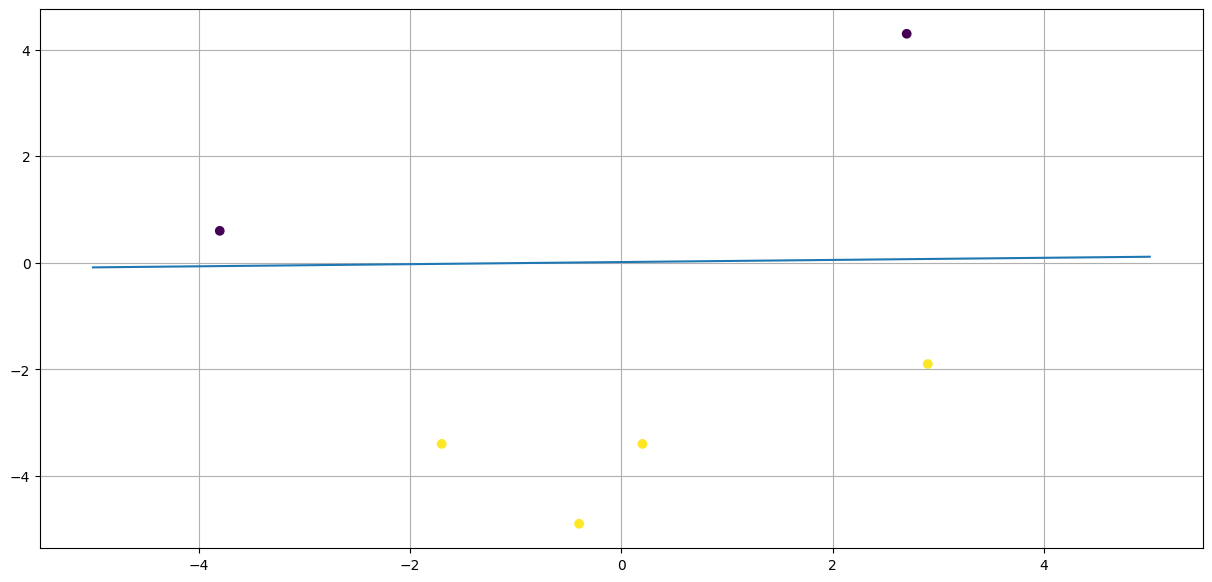

In [11]:
plot_result(data1, labels1, model1)

### Проверка классификации перцептрона на тестовой выборке

Создадим несколько случайных точек, которые на графике будут большего размера. Получим предсказания модели и отметим их соответствующим цветом на картинке.

In [12]:
def check_model(data, labels, model, n=5, threshold=0.5):
    plot_result(data, labels, model, show_result=False) # train data and line

    test_data = np.random.uniform(-5, 5, (n, 2))
    test_labels = model.predict(test_data) > threshold
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100)
    plt.show()

1/1 [==============================] - 0s 72ms/step


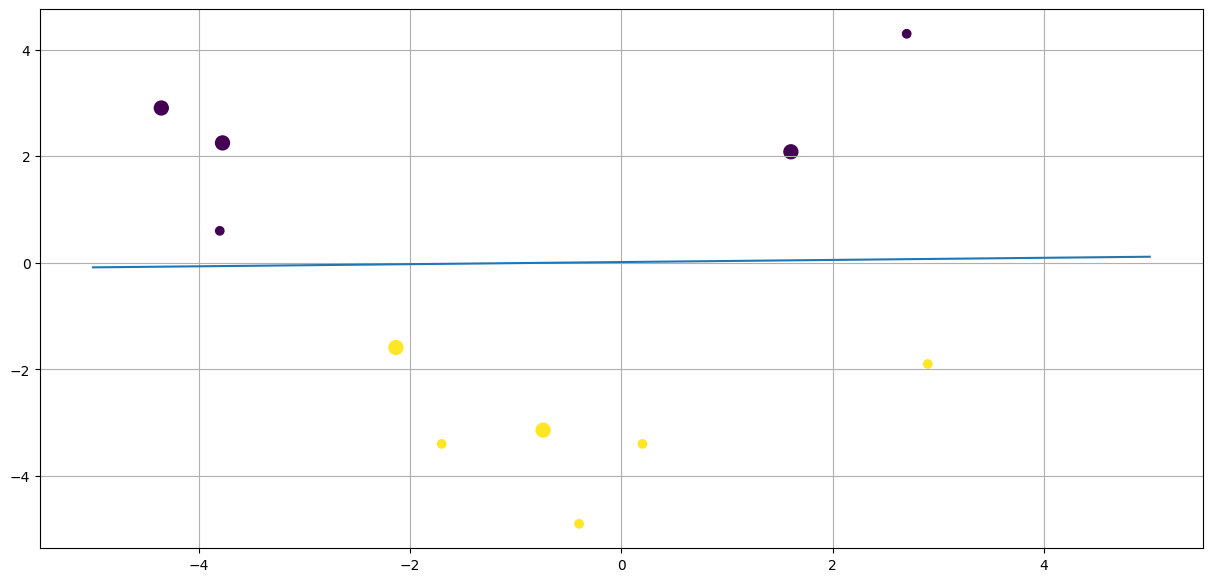

In [13]:
check_model(data1, labels1, model1)

Видим, что перцептрон определил классы без ошибок.

### Задание 2

Определим датасет для второго задания.

In [3]:
data2 = np.array([[-1.5, -0.6], [4.6, -4.6], [4.7, -3.2], [1.6, 0.8], [1.7, -1.4], [1.2, 3.1], [-4.9, -4.2], [4.7, 1.5]])
labels2 = np.array([[0, 0], [0, 1], [0, 1], [1, 0], [0, 0], [1, 0], [0, 1], [1, 1]])
data2, labels2

(array([[-1.5, -0.6],
        [ 4.6, -4.6],
        [ 4.7, -3.2],
        [ 1.6,  0.8],
        [ 1.7, -1.4],
        [ 1.2,  3.1],
        [-4.9, -4.2],
        [ 4.7,  1.5]]),
 array([[0, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]))

In [4]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(2, activation='sigmoid'))

In [5]:
model2.compile(loss='bce', optimizer='adam')

Используем также бинарную кросс-энтропию и сигмоид.

In [6]:
train_info2 = model2.fit(data2, labels2, batch_size=1, epochs=500)

Epoch 1/500
8/8 [==============================] - 1s 3ms/step - loss: 1.0636
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 1.0556
Epoch 3/500
8/8 [==============================] - 0s 3ms/step - loss: 1.0450
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 1.0377
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 1.0278
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 1.0190
Epoch 7/500
8/8 [==============================] - 0s 3ms/step - loss: 1.0098
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 1.0026
Epoch 9/500
8/8 [==============================] - 0s 3ms/step - loss: 0.9929
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 0.9829
Epoch 11/500
8/8 [==============================] - 0s 3ms/step - loss: 0.9756
Epoch 12/500
8/8 [==============================] - 0s 4ms/step - loss: 0.9672
Epoch 13/500
8/8 [==============================] - 0s 3ms/st

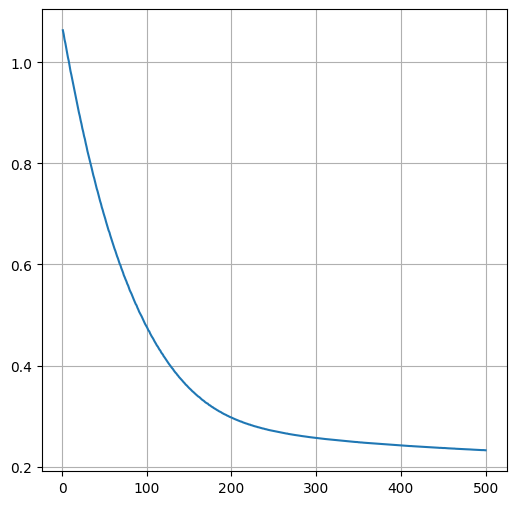

In [7]:
plot_loss(train_info2)

Сейчас мы классифицируем уже на 4 класса, поэтому разделяющих прямых будет две.

Перцептрон в текущем задании эквивалентен формуле:
$$perceptron(x, y) = (x~~ y)
\begin{pmatrix}
  a_{00}& a_{01}\\
  a_{10}& a_{11}
\end{pmatrix} +
\begin{pmatrix}
  b_0\\
  b_1
\end{pmatrix} =
\begin{pmatrix}
  a_{00}x+a_{10}y + b_0\\
  a_{01}x+a_{11}y + b_1
\end{pmatrix}$$

Построив две разделяющие прямые, мы разобьем координатную плоскость на 4 сектора-класса.

Модифицируем функцию:

In [8]:
def plot_result_4classes(data, labels, model, show_result=True):
    plt.figure(figsize=(15,7))

    plt.scatter(data[:, 0], data[:, 1], c=[int(str(i*10 + j), 2) for i, j in labels])

    A, b = model.layers[0].get_weights()

    x_disc = np.linspace(-5, 5, 5)
    plt.plot(x_disc, (-A[0][0] * x_disc - b[0]) / A[1][0])
    plt.plot(x_disc, (-A[0][1] * x_disc - b[1]) / A[1][1])

    plt.grid()
    if show_result:
        plt.show()

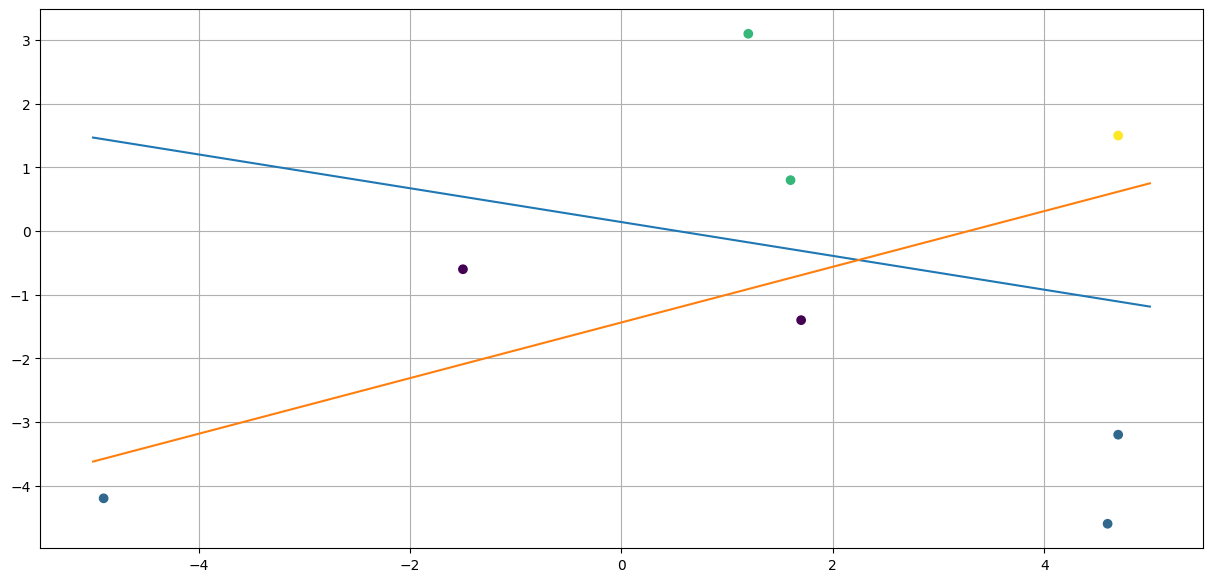

In [24]:
plot_result_4classes(data2, labels2, model2)

2 точки вылезли из своих четвертей. Это связано с датасетом.

Тестируем перцептрон.

In [13]:
def check_model_4classes(data, labels, model, n=5, threshold=0.5):
    plot_result_4classes(data, labels, model, show_result=False) # train data and line

    test_data = np.random.uniform(-5, 5, (n, 2))
    test_labels = model.predict(test_data) > threshold

    plt.scatter(test_data[:, 0], test_data[:, 1],
                c=[int(str(i*10 + j), 2) for i, j in test_labels], s=100)
    plt.show()

1/1 [==============================] - 0s 185ms/step


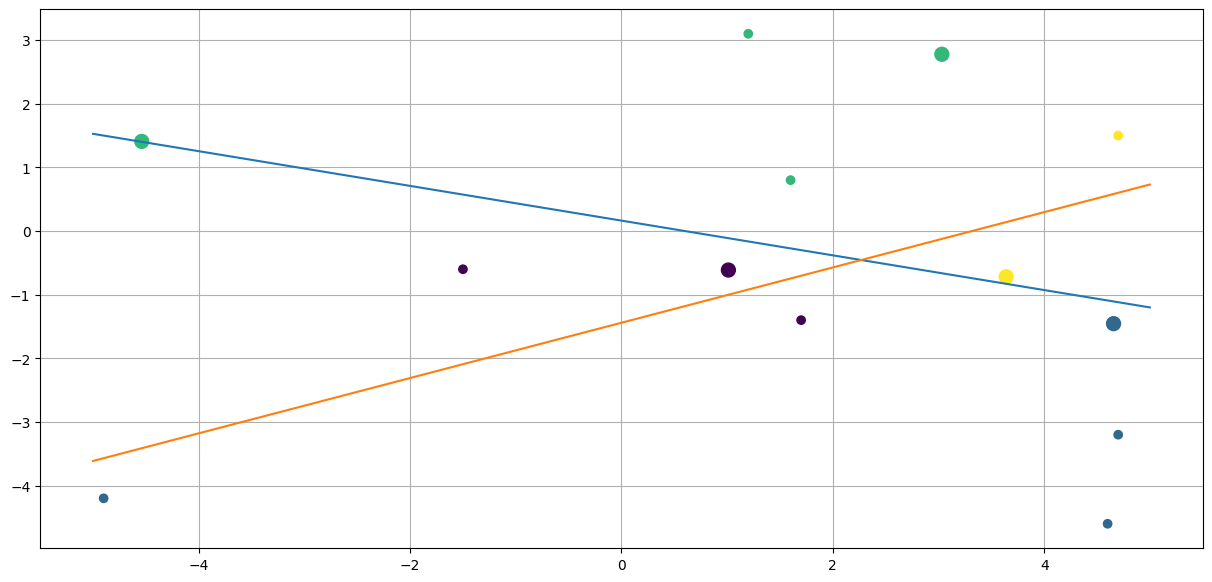

In [14]:
check_model_4classes(data2, labels2, model2)

Видим, что перцептрон неплохо справляется с классификацией тестовых точек

# Вывод

В данной работе я решил задачу классификации на 2 и 4 класса с помощью однослойной нейросети. Обученный перцептрон довольно неплохо справляется со своей задачей - в этом мы убедились, проверив его на тестовой выборке. Стоит отметить, что мы не можем гарантировать стопроцентное качество обученных моделей, так как для обучения использовалось очень мало данных.